To solve this problem analytically, we need to set up the Lagrangian for the representative household's problem, find the first-order conditions (FOCs), and derive the Euler equation.

The Lagrangian for the household's problem is:

L = Σ[β^t * log(c_t) + λ_t * (y_t - c_t - i_t)]

where λ_t is the Lagrange multiplier associated with the constraint in period t.

The constraints are:

c_t + i_t = y_t
y_t = A * k_t^α
i_t = k_{t+1} - (1-δ)k_t
Substituting the constraints into the Lagrangian:

L = Σ[β^t * log(c_t) + λ_t * (A * k_t^α - c_t - k_{t+1} + (1-δ)k_t)]

Now we need to find the FOCs with respect to c_t and k_{t+1}. We will differentiate the Lagrangian with respect to these variables:

∂L/∂c_t = β^t * (1/c_t) - λ_t = 0 => λ_t = β^t * (1/c_t) (1)

∂L/∂k_{t+1} = -λ_t + β * λ_{t+1} * (α * A * k_{t+1}^(α-1) + 1 - δ) = 0

Now we can substitute equation (1) into the above equation to eliminate λ_t:

-β^t * (1/c_t) + β * (β^{t+1} * (1/c_{t+1})) * (α * A * k_{t+1}^(α-1) + 1 - δ) = 0

Simplify and rearrange to get the Euler equation:

c_t/c_{t+1} = β * (α * A * k_{t+1}^(α-1) + 1 - δ)

This Euler equation characterizes the equilibrium of the economy. It governs the optimal path of consumption and investment over time for the representative household.

In [3]:
from scipy.optimize import fsolve

def equation(k):
    return k**(-0.7) - (0.07 * 0.98) / (0.3 * 10)

k_star = fsolve(equation, 1)[0]

print(k_star)

220.79839536906678


In [15]:

import numpy as np
from scipy.optimize import root

alpha = 0.3
beta = 0.98
delta = 0.07
y_star = 10

# Define a function to find the steady-state capital stock (k_star)
def find_k_star(k, delta, alpha):
    return (delta * k) / (1 - (1 - delta)) - k

# Define a function to find the TFP parameter A, given the steady-state capital stock (k_star)
def find_A(k_star, y_star, alpha):
    return y_star / (k_star**alpha)

# Find the steady-state capital stock (k_star) using a root-finding method
k_star_initial_guess = 1
k_star_solution = root(find_k_star, k_star_initial_guess, args=(delta, alpha)).x[0]

# Find the TFP parameter A, given the steady-state capital stock (k_star)
A_solution = find_A(k_star_solution, y_star, alpha)
A_solution
print(A_solution)

9.999999687075636


220.79839536906678


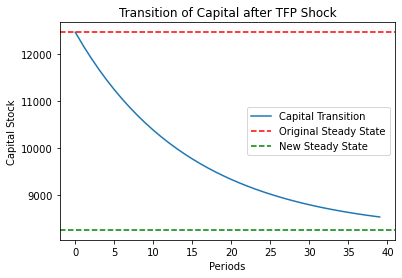

In [12]:
import numpy as np
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.3
beta = 0.98
delta = 0.07
y_star = 10

# Original steady-state capital equation
def find_k_star(A):
    return ((alpha * A) / (delta + 1 - beta))**(1 / (1 - alpha))

# Find original A value
A_solution = fsolve(equation, 1)[0]
print(A_solution)

# Calculate k_star with the original A value
k_star_original = find_k_star(A_solution)

# Apply the TFP shock
A_shocked = A_solution * 0.75

# Calculate the new steady-state capital stock (k_star_new) with the shocked A value
k_star_new = find_k_star(A_shocked)

# Equilibrium equation
def k_next(k, A):
    return (beta * (alpha * A * k**alpha + k - delta * k))

# Transition of capital
T = 40
k_transition = np.zeros(T)
k_transition[0] = k_star_original

for t in range(1, T):
    k_transition[t] = k_next(k_transition[t - 1], A_shocked)

# Plot the transition of capital
plt.plot(k_transition, label='Capital Transition')
plt.axhline(y=k_star_original, color='r', linestyle='--', label='Original Steady State')
plt.axhline(y=k_star_new, color='g', linestyle='--', label='New Steady State')
plt.xlabel('Periods')
plt.ylabel('Capital Stock')
plt.legend()
plt.title('Transition of Capital after TFP Shock')
plt.show()


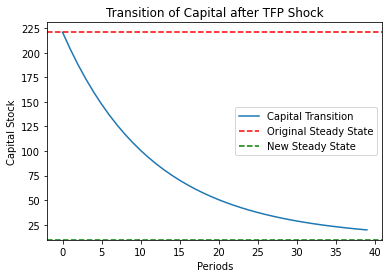

In [14]:

alpha = 0.3
beta = 0.98
delta = 0.07
y_star = 10

# Steady-state capital equation
def find_k_star(A):
    return ((alpha * A) / (delta + 1 - beta))**(1 / (1 - alpha))

# Function to find A given y_star and k_star
def find_A(k_star, y_star, alpha):
    return y_star / (k_star**alpha)

# Find original A value
k_star_original = fsolve(equation, 1)[0]
A_solution = find_A(k_star_original, y_star, alpha)

# Apply the TFP shock
A_shocked = A_solution * (1 - 0.25)

# Calculate the new steady-state capital stock (k_star_new) with the shocked A value
k_star_new = find_k_star(A_shocked)

# Equilibrium equation
def k_next(k, A):
    return (beta * (alpha * A * k**alpha + k - delta * k))

# Transition of capital
T = 40
k_transition = np.zeros(T)
k_transition[0] = k_star_original

for t in range(1, T):
    k_transition[t] = k_next(k_transition[t - 1], A_shocked)

# Plot the transition of capital
plt.plot(k_transition, label='Capital Transition')
plt.axhline(y=k_star_original, color='r', linestyle='--', label='Original Steady State')
plt.axhline(y=k_star_new, color='g', linestyle='--', label='New Steady State')
plt.xlabel('Periods')
plt.ylabel('Capital Stock')
plt.legend()
plt.title('Transition of Capital after TFP Shock')
plt.show()


In [17]:
import numpy as np
from scipy.optimize import root_scalar
alpha = 0.3
beta = 0.98
delta = 0.07
y_star = 10

def f(A):
    return y_star - (beta * (alpha*A)**alpha * (1-delta)**(1-alpha)) / ((1+1/beta*(1-delta))**alpha - beta*(1-delta)**(1-alpha))

A_star = np.round(optimize.root_scalar(f, bracket=[0.01, 10]).root, 2)
print("The value of A in steady-state such that y* = 10 is:", A_star)

NameError: name 'optimize' is not defined